In [1]:
# Now I ain't cheap, but I can be had...
# My price for taking a stranded Lady to a telephone is 100M
# And I caught your "toy"
# Not only that, I know exactly where, how, and when
# Yes, Yes, Yes! NO! NO! Ohh baby, behaAave!

In [2]:
from __future__ import print_function, division
import datetime
import time
import numpy as np
import pandas as pd
import amipy
import quant_iq as iq
from quant_iq import MultiAssetClassStrategy
from Zurich import PerfectlyBalancedPortfolio

In [3]:
START_DATE = datetime.datetime(2007, 5, 1)
END_DATE = datetime.datetime(2016, 12, 31)

OBJ = iq.Context()

STRAT = MultiAssetClassStrategy(OBJ)
portfolio = STRAT.Run(START_DATE, END_DATE)



Starting Portfolio Equity: 5385777804.8
Final Portfolio Equity: 28360738863.6
Total return: 426.59% 
Daily return: 0.07% 
Risk: 0.20% 
Sharpe: 5.43 
Sortino: 8.90 
CAGR: 18.75% 
Max drawdown: -2.46% 


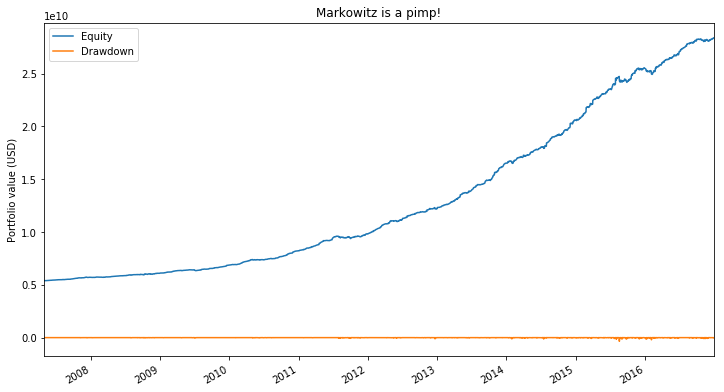



Stats for Total from 2007-05-01 00:00:00 - 2016-12-30 00:00:00
Annual risk-free rate considered: 0.25%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
426.59%             5.43  18.75%  -2.46%

Annualized Returns:
mtd    3m     6m     ytd     1y      3y      5y      10y     incep.
-----  -----  -----  ------  ------  ------  ------  ------  --------
0.93%  0.43%  4.88%  11.17%  11.05%  19.75%  23.62%  18.75%  18.75%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  5.43     4.07       2.25
mean    17.25%   17.47%     19.76%
vol     3.13%    4.23%      8.66%
skew    2.15     0.44       0.24
kurt    20.33    0.09       0.09
best    2.32%    4.84%      35.47%
worst   -1.40%   -1.32%     6.86%

Drawdowns:
max       max # days  avg       avg # days
------  ------------  ------  ------------
-2.46%           113  -0.16%          5.84

Misc:
---------------  -------
avg. up month    1.66%
avg. d

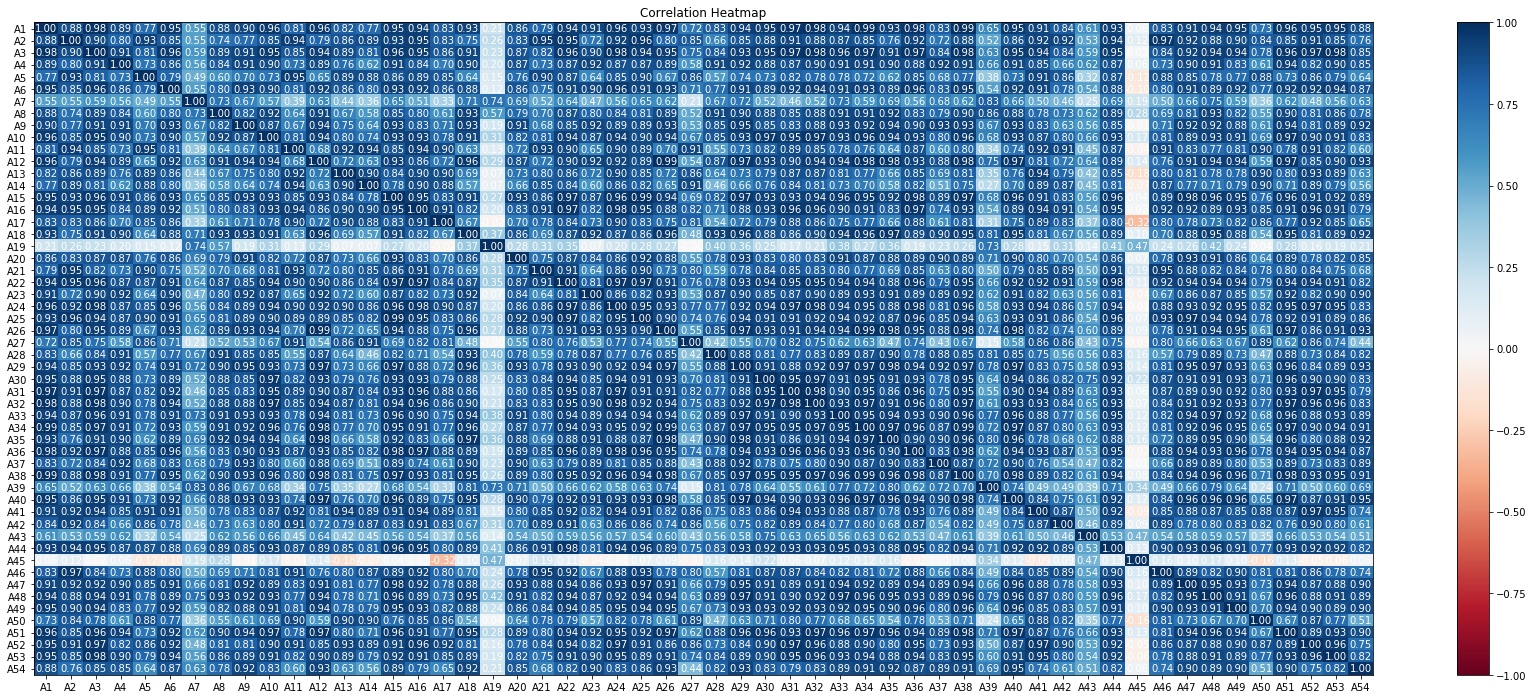

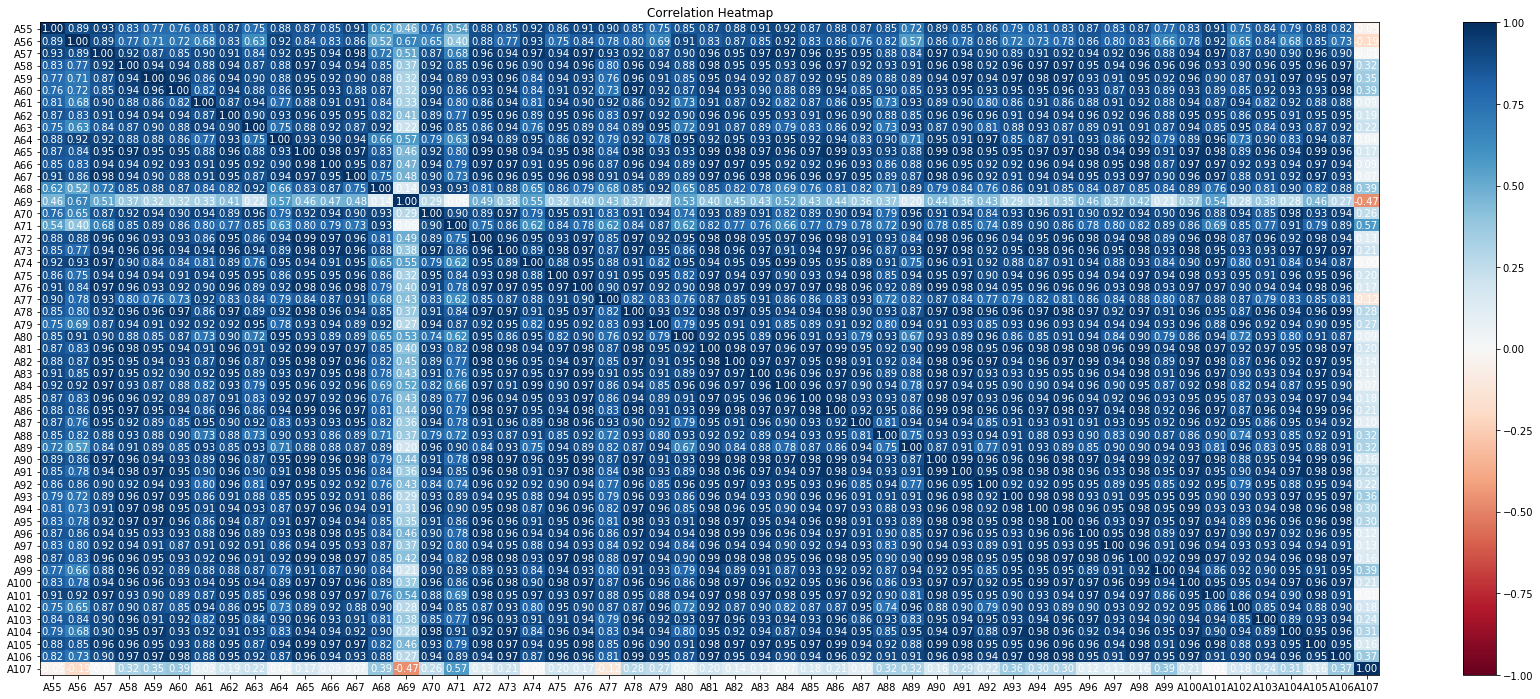

In [4]:
OBJ = PerfectlyBalancedPortfolio(START_DATE, END_DATE)
portfolio2 = OBJ.build()

portfolio = portfolio.join(portfolio2, lsuffix='2.')

portfolio1 = portfolio.fillna(method='ffill').fillna(method='bfill')
stats = amipy.analyze_portfolio(portfolio1, 0.0025, title='Markowitz is a pimp!')
amipy.analyze_portfolio_ffn(portfolio1, 0.0025)

SPY = iq.mongo_grab('SPY', 'YAHOO', START_DATE, END_DATE)
portfolio3 = pd.DataFrame(index=SPY.index)
spdrs = ['XLY', 'XLK', 'XLV', 'XLP']
for spdr in spdrs:
    mdata = iq.mongo_grab(spdr, 'YAHOO', START_DATE, END_DATE)
    portfolio3 = portfolio3.join(mdata)

amipy.analyze_portfolio(portfolio1, 0.0025, False)

print('\n vs 4 sector [XLK, XLP, XLV, XLY] buy and hold portfolio')
amipy.analyze_portfolio(portfolio3, 0.0025, False)

ptwo = portfolio1/portfolio1.iloc[0]
ptwo.columns = ['A'+str(x) for x in range(1, len(ptwo.columns)+1)]
fhalf = ptwo.iloc[:, :54]
shalf = ptwo.iloc[:, 54:]
fheat = fhalf.plot_corr_heatmap(title='Correlation Heatmap', figsize=(30,12))
sheat = shalf.plot_corr_heatmap(title='Correlation Heatmap', figsize=(30,12))

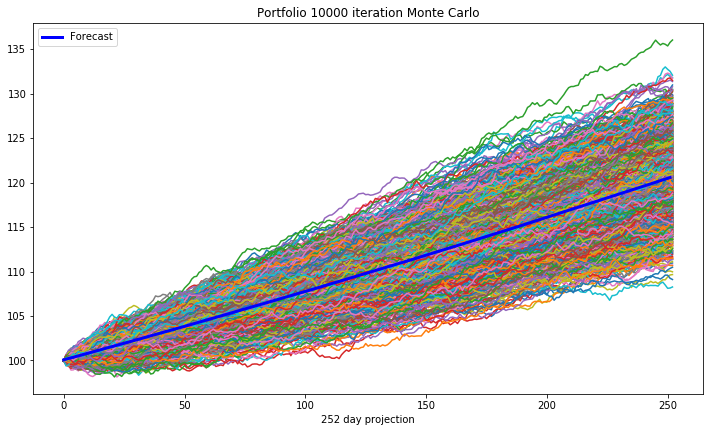

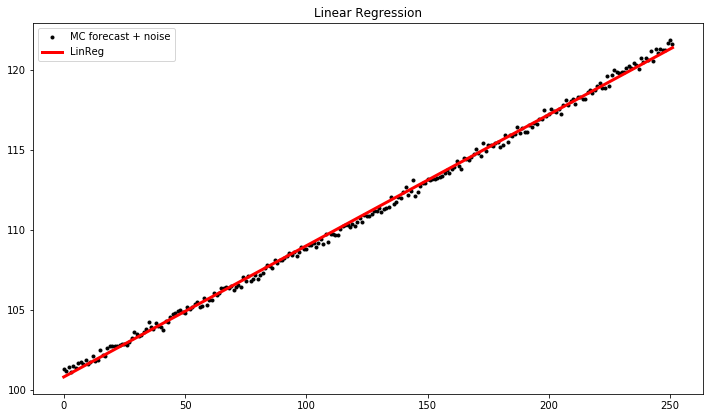

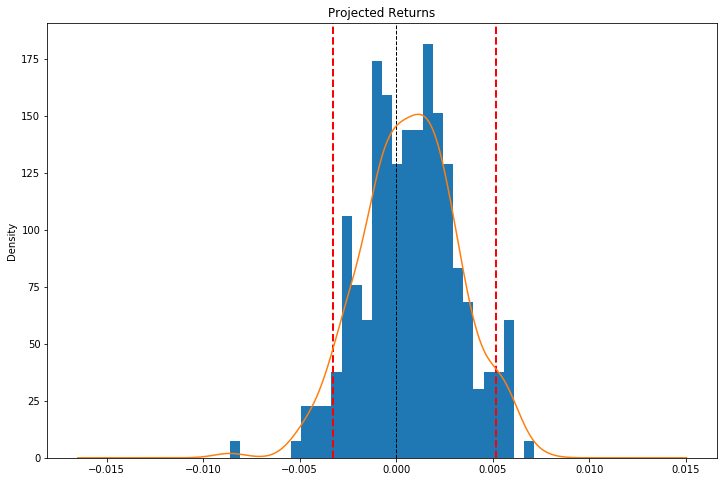

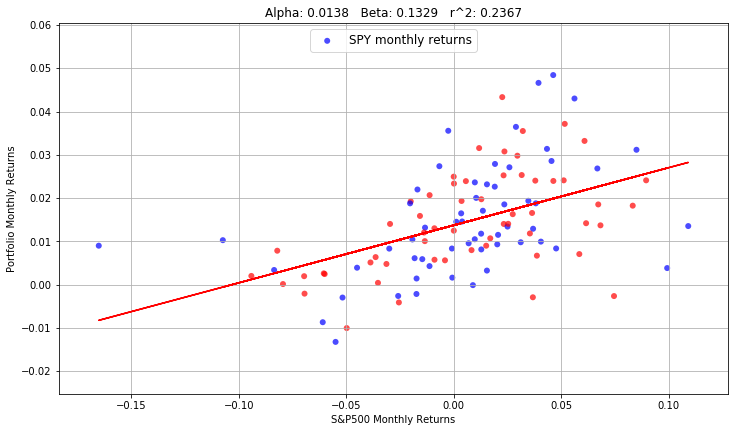

Portfolio stats - Beta: 0.1329  Alpha: 0.0138 

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     35.05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):           3.52e-08
Time:                        17:14:34   Log-Likelihood:                 359.51
No. Observations:                 115   AIC:                            -715.0
Df Residuals:                     113   BIC:                            -709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [5]:
from forecast import MonteCarlo, RegOLS
from sklearn.linear_model import LinearRegression

portfolio = portfolio.fillna(method='ffill').fillna(method='bfill')
portfolio['Total'] = portfolio.sum(axis=1)
series = portfolio['Total']
series.name = 'Portfolio'

steps = 10000
MMC = MonteCarlo(steps, plot=True)

stats = MMC.Run(series)
###########################################################################
df = portfolio[:][['Total']].join(SPY)
df.columns = ['Portfolio', 'SPY']
dfm = df.resample('M').last()
returns = dfm.pct_change().dropna()

OLS = RegOLS()
OLS.regress(returns)

lr = LinearRegression()
_df = np.asarray(returns)
X, y = _df[:, 1:], _df[:, 0]
lr.fit(X, y)
print('Portfolio stats - Beta: %.4f  Alpha: %.4f \n' % (lr.coef_, lr.intercept_))
print(OLS.model.summary())

In [6]:
# Biggy, Biggy, Biggy! Can't you see?
# You don't need to control me, you need to unleash me!
# I'm Leo Messy of this game. Put me on the field!
# I play the market like Texas Dolly play Big Slick )))

# And don't waste your time trying to bluff me off my hand, not only do I
# have aces in the hole, I floped the nuts. And your henchmen can't even keep
# a poker face on, where you find these clowns? Ha hah! And just so you know,
# I twenty table this game.

# Seattle tower, this is bravo india gstring bravo oscar oscar tango yankee
# we are westbound 10 miles east of Tacoma, requesting permission to land, over
# bravo india gstring, this is Seattle tower
# you are cleared to land on runway 69, over
# bravo india gstring landing on runway 69, over
# bravo india gstring, you fox you, don't be a stranger ;-)


# Now this portfolio is 80% Markowitz buy and hold, 20% algorithmic long/short
# The ai brain has been broken up into several compiled libraries,
# each of which is equipped with integrity check, license authentication, and
# is tied to my hardware only, don't waste your time trying to get cute.
# I'm not the type of idiot to start an underfunded operation either,
# so unless you make your move, this thing is gonna be collecting dust
# in a vault. Give me Europe, UK, Hong Kong, and Japan data, and I'll scale it
# four fold. The equity line will be truly convex then, just like a
# bravo india gstring bravo oscar oscar tango yankee. And that is a great
# place for my mind to focus on, wouldn't you say?

# You got it shorty flaunt it! That Wall St bs, we on it. Let's do this!

# Yall know how that movie ends right?

# Big shout to the one and only BDFL, everyone @ Anaconda, Wes McKinney, Philippe Morissette, 
# Brian Peterson, Joshua Ulrich, Marc Chaikin, David Varadi, Harry Markowitz, Richard Wyckoff,  
# Tucker Balch, and all the real players in the struggle! It's all good baby baby!